# counting-stars

******

Please find a Star Wars image (in png format):

* write a script that opens it and loads it as an array
* write a script that counts the number of stars in it :)

******

## Import librairies

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Original image

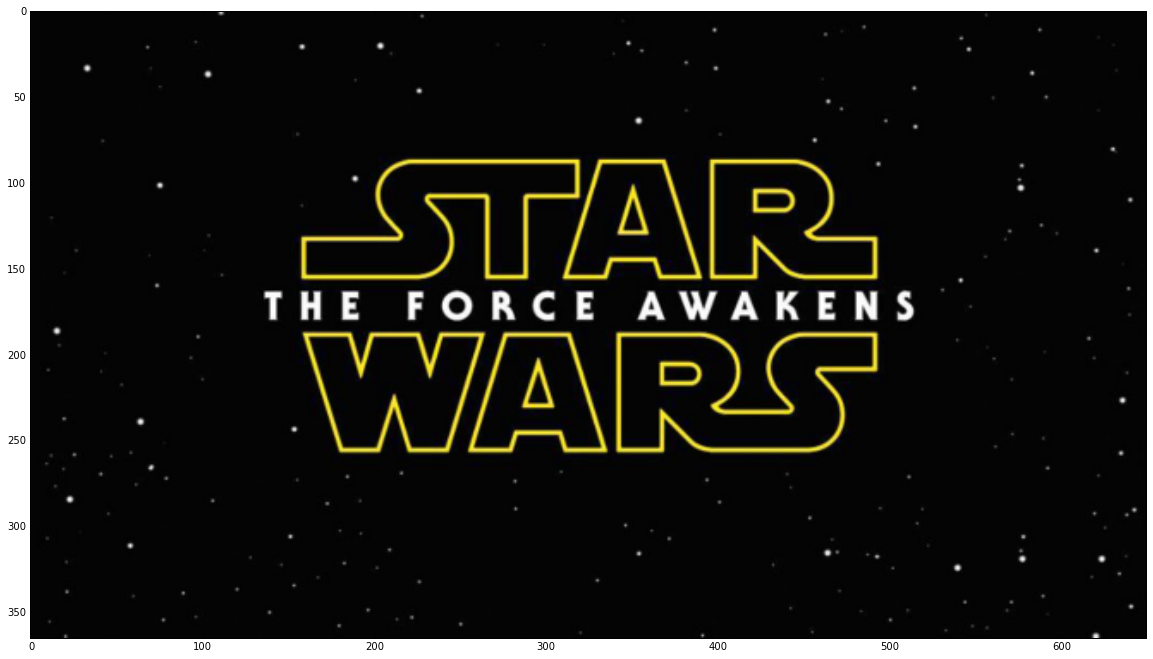

In [2]:
# Read image
filename = '..\star_wars.png'
im = cv2.imread(filename)

# Show stars
plt.figure(figsize=(20, 16))
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

## Simple Blob Detector

### Setup SimpleBlobDetector parameters

In [3]:
# Initialize SimpleBlobDetector parameters object
params = cv2.SimpleBlobDetector_Params()

# Threshold parameters
params.minThreshold = 10  # 22
params.maxThreshold = 24
params.thresholdStep = 1
params.minDistBetweenBlobs = 1 # 4

# Color filter parameters
params.filterByColor = 1
params.blobColor = 255

# Size filter parameters
params.filterByArea = 1
params.minArea = 0.1 # 0.5
params.maxArea = 20  # 14

# Shape filter parameters
params.filterByConvexity = 0
# params.minConvexity = 0.8
params.filterByCircularity = 0
params.filterByInertia = 0

In [4]:
# Set up the detector with the parameters above
detector_th10_24 = cv2.SimpleBlobDetector_create(params)

# Detect blobs
stars = detector_th10_24.detect(im)

### Results

In [5]:
# printing parameter of the detector
for param in params.__dir__():
    if param[:2] != "__":
        print(param, str(getattr(params, param)))
print("\nNumber of stars: ", len(stars))

# Draw detected blobs as red circles
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob
im_with_stars = cv2.drawKeypoints(im, stars, np.array([]), (0, 0, 255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

maxCircularity 3.4028234663852886e+38
maxArea 20.0
filterByCircularity False
minCircularity 0.800000011920929
minInertiaRatio 0.10000000149011612
thresholdStep 1.0
maxInertiaRatio 3.4028234663852886e+38
filterByInertia False
minDistBetweenBlobs 1.0
maxThreshold 24.0
minConvexity 0.949999988079071
maxConvexity 3.4028234663852886e+38
minThreshold 10.0
filterByArea True
minRepeatability 2
filterByConvexity False
blobColor 255
minArea 0.10000000149011612
filterByColor True

Number of stars:  206


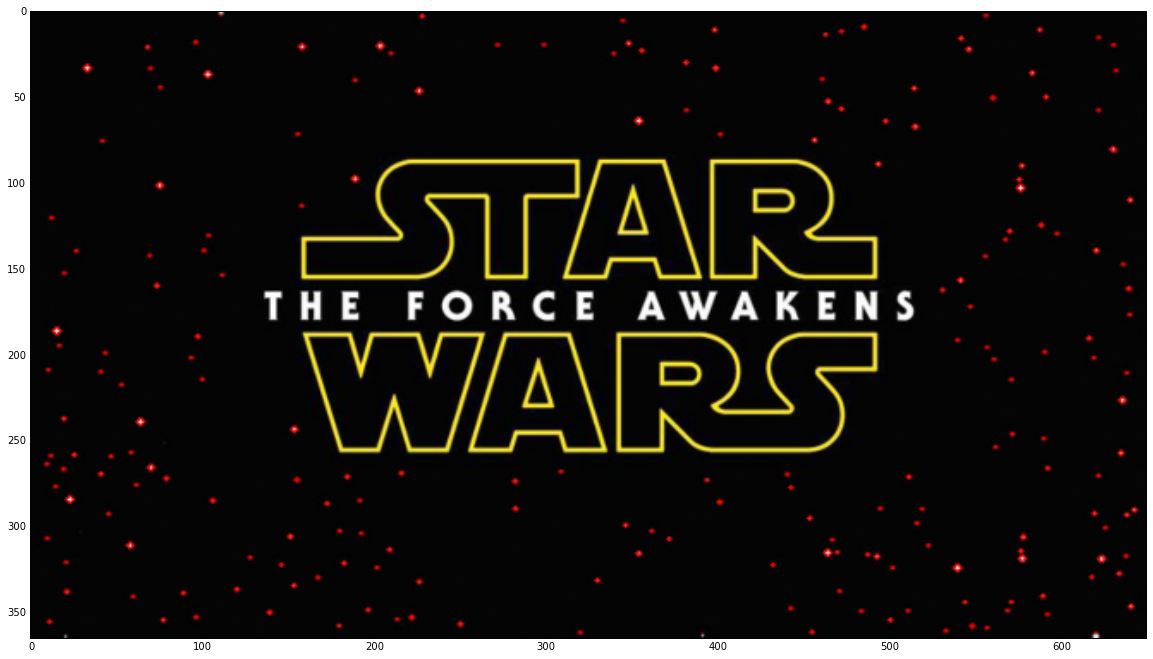

In [6]:
# Show stars on the image
plt.figure(figsize=(20, 16))
plt.imshow(cv2.cvtColor(im_with_stars, cv2.COLOR_BGR2RGB))
plt.show()

### More details

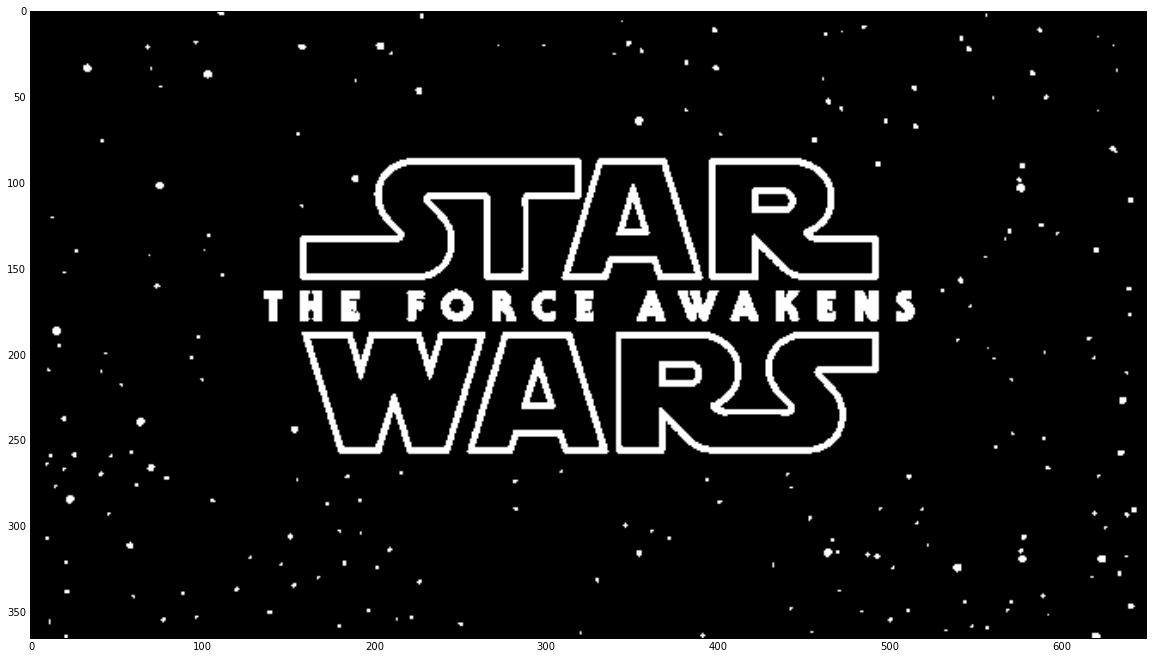

In [7]:
im_bnw = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh23 = cv2.threshold(im_bnw, 23, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(20, 16))
plt.imshow(thresh23, cmap='gray')

Number of stars with threshold: 161


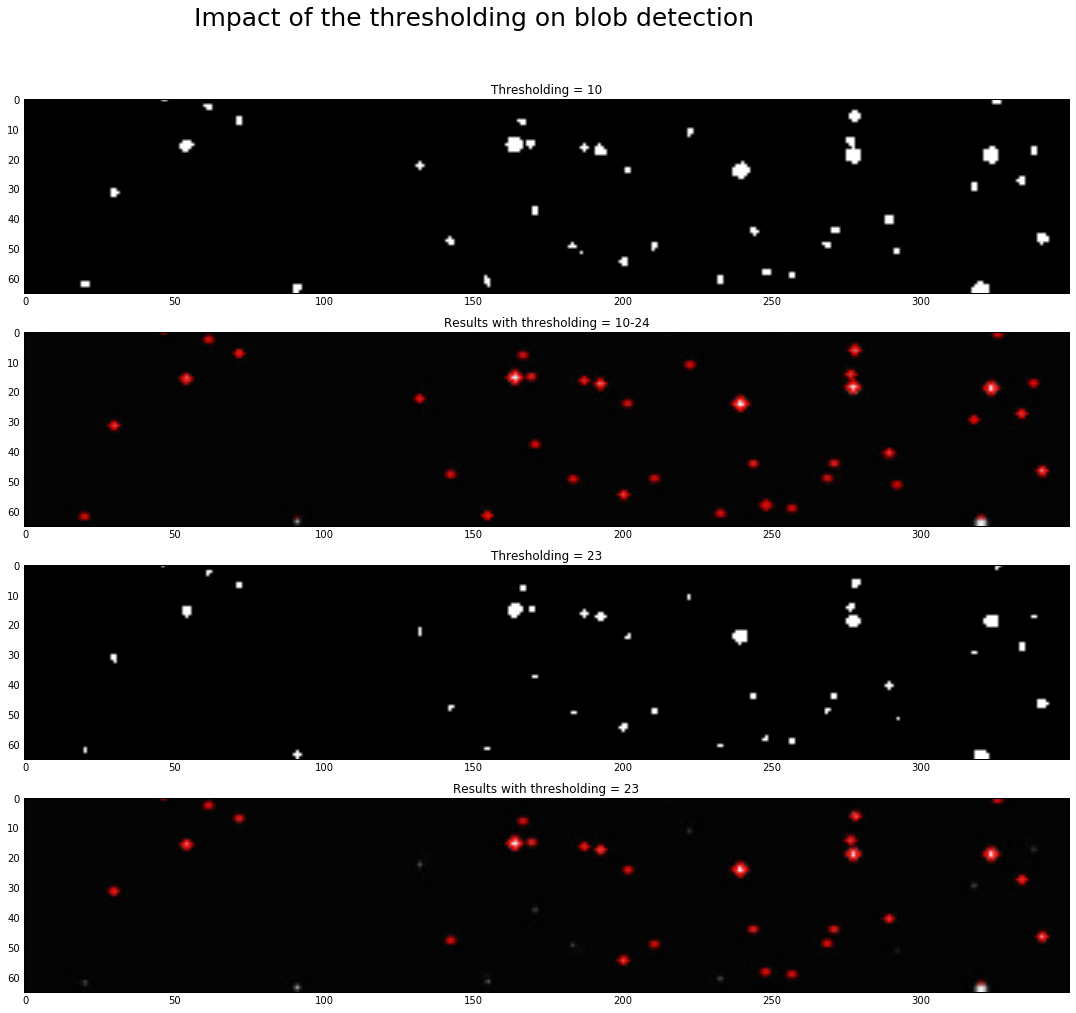

In [8]:
fig = plt.figure(figsize=(80, 16))
fig.suptitle("Impact of the thresholding on blob detection", fontsize=25)

ax = plt.subplot(411)
ret, thresh10 = cv2.threshold(im_bnw, 10, 255, cv2.THRESH_BINARY)
ax.set_title("Thresholding = 10")
plt.imshow(thresh10[300:500, 300:], 'gray')

ax = plt.subplot(412)
ax.set_title("Results with thresholding = 10-24")
plt.imshow(cv2.cvtColor(im_with_stars[300:500, 300:], cv2.COLOR_BGR2RGB))

ax = plt.subplot(413)
ax.set_title("Thresholding = 23")
ret, thresh20 = cv2.threshold(im_bnw, 23, 255, cv2.THRESH_BINARY)
plt.imshow(thresh20[300:500, 300:], 'gray')

params_th24 = params

# Threshold parameters
params_th24.minThreshold = 23
params_th24.maxThreshold = 25
params_th24.thresholdStep = 1

detector_th24 = cv2.SimpleBlobDetector_create(params_th24)

# Detect blobs
stars_th24 = detector_th24.detect(im)
print("Number of stars with threshold: " + str(len(stars_th24)))

im_with_stars_th24 = cv2.drawKeypoints(im, stars_th24, np.array([]), (0, 0, 255),
                                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

ax = plt.subplot(414)
ax.set_title("Results with thresholding = 23")
plt.imshow(cv2.cvtColor(im_with_stars_th24[300:500, 300:], cv2.COLOR_BGR2RGB))

plt.show()